# WELCOME


In [2]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import skew
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.3f}'.format
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestRegressor
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz
import pickle
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500) 
pd.set_option('display.max_rows', 500)
from sklearn.linear_model import LinearRegression
pd.options.display.float_format = '{:.3f}'.format
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as acc
from sklearn.ensemble import RandomForestRegressor

In [3]:
df=pd.read_csv("last_data.csv")

In [11]:
columns=["km","hp_Kw","age","make_model_A1","make_model_A3","make_model_Corsa","make_model_Astra",

"make_model_Insignia","make_model_Clio","make_model_Duster","make_model_Espace",
"Gearing_Type_Automatic","Gearing_Type_Manual","Gearing_Type_Semi-automatic"]

df[0]

In [12]:
t=pd.get_dummies(pd.read_csv("df1.csv").loc[[1]]).reindex(columns=columns,fill_value=0)
t

,km,hp_Kw,age,make_model_A1,make_model_A3,make_model_Corsa,make_model_Astra,make_model_Insignia,make_model_Clio,make_model_Duster,make_model_Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
1,93473.000,0,3.000,0,0,0,0,0,0,0,0,1,0,0


In [13]:
r=pd.read_csv("df1.csv").loc[[1]]
r

,make_model,km,hp_kW,age,price,Gearing_Type
1,Renault Clio,93473.000,66.000,3.000,11950,Automatic


In [23]:
prediction=213.324

In [24]:
(float(prediction)/float(r.price.values))*100

1.7851380753138075

99.44981924209185

In [25]:
(float(prediction)/float(r.price.values))*100
c

11950

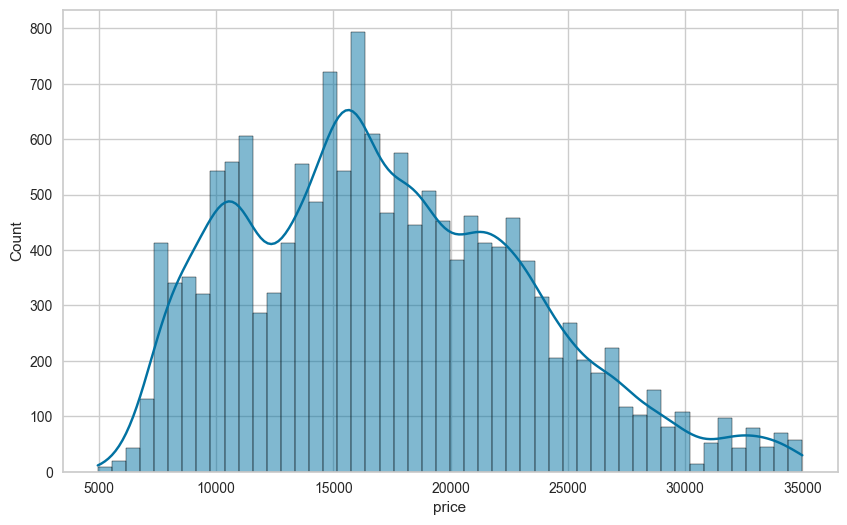

In [5]:
sns.histplot(df.price, bins=50, kde=True);

In [6]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train) # overfitting var mı yok mu kıyaslamak için
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [7]:
X=df.drop(columns=["price"])
y=df.price

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

#Random_Forest

In [9]:
random_final_model= RandomForestRegressor(n_estimators= 500,max_depth=None,min_samples_leaf=2,min_samples_split=8,max_features=2)

In [10]:
random_final_model.fit(X_train,y_train)

RandomForestRegressor(max_features=2, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=500)

In [11]:
y_pred = random_final_model.predict(X_test)
rn_R2 = r2_score(y_test, y_pred)
rn_mae = mean_absolute_error(y_test, y_pred)
rn_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [12]:
random_final= RandomForestRegressor(n_estimators= 500,max_depth=None,min_samples_leaf=2,min_samples_split=8,max_features=2)

In [13]:
random_final.fit(X,y)

RandomForestRegressor(max_features=2, min_samples_leaf=2, min_samples_split=8,
                      n_estimators=500)

#Decision_Tree

In [14]:
tuned_hyper_model= DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=8,splitter='random')

In [15]:
tuned_hyper_model.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=8,
                      splitter='random')

In [16]:
y_pred = tuned_hyper_model.predict(X_test)
Dt_R2 = r2_score(y_test, y_pred)
Dt_mae = mean_absolute_error(y_test, y_pred)
Dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [17]:
Decision_T= DecisionTreeRegressor(max_depth=None,min_samples_leaf=2,min_samples_split=8,splitter='random')

In [18]:
Decision_T.fit(X,y)

DecisionTreeRegressor(min_samples_leaf=2, min_samples_split=8,
                      splitter='random')

# Lasso

In [19]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
alpha_space = np.linspace(0.01, 100, 100)

In [20]:
lasso_model = Lasso(random_state=42)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
lasso_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [21]:
train_val(lasso_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

,train,test
R2,0.870,0.868
mae,1593.542,1600.997
mse,4917657.368,4915994.583
rmse,2217.579,2217.204


In [22]:
y_pred = lasso_grid_model.predict(X_test_scaled)
Lasso_R2 = r2_score(y_test, y_pred)
Lasso_mae = mean_absolute_error(y_test, y_pred)
Lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [23]:
lasso_grid_model.fit(X,y)

/opt/anaconda3/envs/Demo/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+08, tolerance: 5.313e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/Demo/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.230e+08, tolerance: 5.173e+07
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/envs/Demo/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Du

GridSearchCV(cv=10, estimator=Lasso(random_state=42), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

#Visually Compare Models Performance In a Graph

In [24]:
scores = {   
 "lasso_m": {"r2_score": Lasso_R2, 
 "mae": Lasso_mae, 
 "rmse": Lasso_rmse},

 "Decission_m": {"r2_score": Dt_R2, 
 "mae": Dt_mae, 
 "rmse": Dt_rmse},

"Random_m": {"r2_score": rn_R2, 
 "mae": rn_mae, 
 "rmse": rn_rmse},
         
 #"final_m": {"r2_score": fm_R2, 
 #"mae": fm_mae , 
 #"rmse": fm_rmse}
 }
scores = pd.DataFrame(scores).T
scores

,r2_score,mae,rmse
lasso_m,0.868,1600.997,2217.204
Decission_m,0.934,1055.110,1570.066
Random_m,0.941,1004.384,1482.992


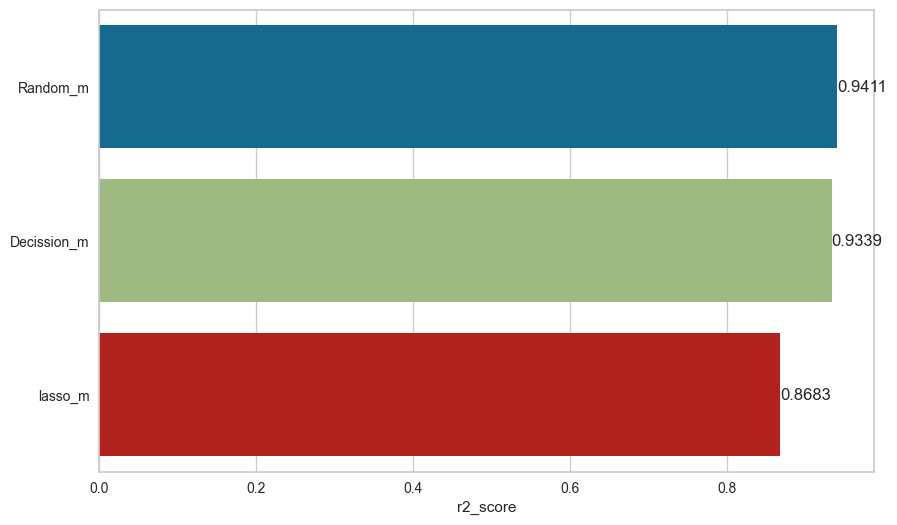

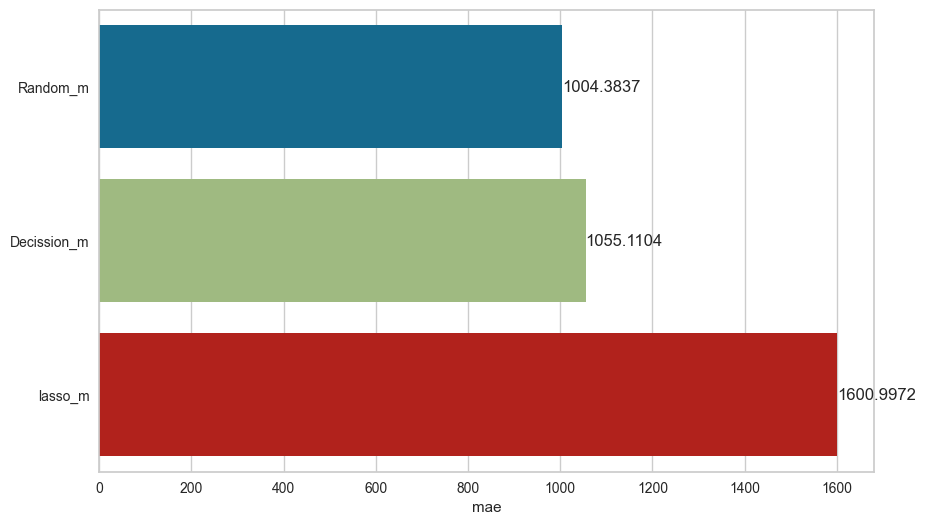

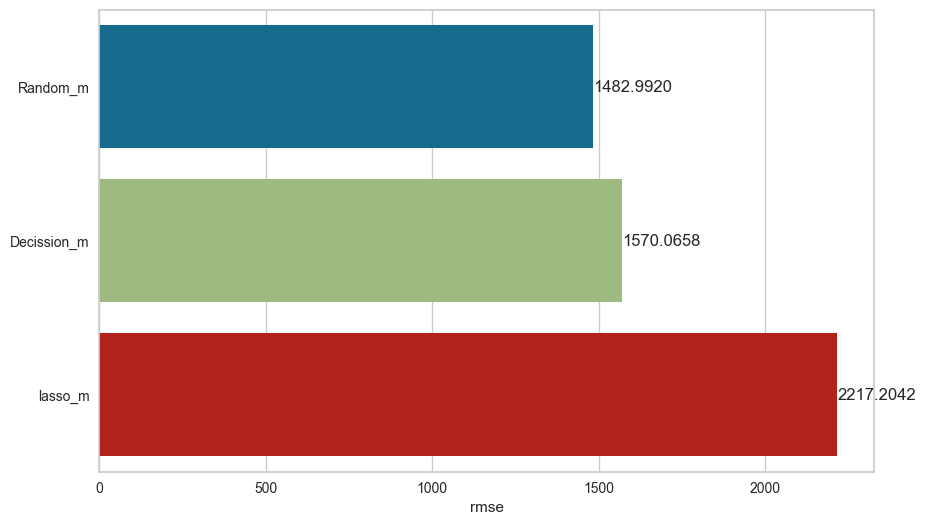

In [25]:
#metrics = scores.columns
for i, j in enumerate(scores):
    plt.figure(i)
    if j == "r2_score":
        ascending = False
    else:
        ascending = True
    compare = scores.sort_values(by=j, ascending=ascending)
    ax = sns.barplot(x = compare[j] , y= compare.index)
    for p in ax.patches:
            width = p.get_width()                        # get bar length
            ax.text(width,                               # set the text at 1 unit right of the bar
                    p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                    '{:.4f}'.format(width),             # set variable to display, 2 decimals
                    ha = 'left',                         # horizontal alignment
                    va = 'center') 

In [26]:
pickle.dump(random_final,open("last_model_RF","wb"))
pickle.dump(Decision_T,open("last_model_Dt","wb"))
pickle.dump(lasso_grid_model,open("last_model_Lasso","wb"))

In [27]:
model=pickle.load(open("last_model_RF","rb"))
model1=pickle.load(open("last_model_Dt","rb"))

In [28]:
my_dict1={
    "age" : 2,
    "hp_Kw":120,
    "km":75000,
    "make_model":"A1",
    "Gearing_Type":"Automatic"
}
y=pd.DataFrame.from_dict([my_dict1])

columns=["km","hp_Kw","age","make_model_A1","make_model_A3","make_model_Corsa","make_model_Astra",

"make_model_Insignia","make_model_Clio","make_model_Duster","make_model_Espace",
"Gearing_Type_Automatic","Gearing_Type_Manual","Gearing_Type_Semi-automatic"]

y=pd.get_dummies(y).reindex(columns=columns,fill_value=0)

In [29]:
y

,km,hp_Kw,age,make_model_A1,make_model_A3,make_model_Corsa,make_model_Astra,make_model_Insignia,make_model_Clio,make_model_Duster,make_model_Espace,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,75000,120,2,1,0,0,0,0,0,0,0,1,0,0


In [30]:
model1.predict(y)

array([16926.25])

In [31]:
df

,km,hp_kW,age,price,make_model_A1,make_model_A3,make_model_Astra,make_model_Clio,make_model_Corsa,make_model_Duster,make_model_Espace,make_model_Insignia,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
0,56013.000,66.000,3.000,15770,1,0,0,0,0,0,0,0,1,0,0
1,80000.000,141.000,2.000,14500,1,0,0,0,0,0,0,0,1,0,0
2,83450.000,85.000,3.000,14640,1,0,0,0,0,0,0,0,1,0,0
3,73000.000,66.000,3.000,14500,1,0,0,0,0,0,0,0,1,0,0
4,16200.000,66.000,3.000,16790,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15412,10803.000,118.000,1.000,33990,0,0,0,0,0,0,1,0,1,0,0
15413,15.000,165.000,0.000,33975,0,0,0,0,0,0,1,0,1,0,0
15414,1.000,118.000,1.000,33990,0,0,0,0,0,0,1,0,1,0,0
15415,15.000,146.000,0.000,33975,0,0,0,0,0,0,1,0,1,0,0


In [32]:
df.sample(5)

,km,hp_kW,age,price,make_model_A1,make_model_A3,make_model_Astra,make_model_Clio,make_model_Corsa,make_model_Duster,make_model_Espace,make_model_Insignia,Gearing_Type_Automatic,Gearing_Type_Manual,Gearing_Type_Semi-automatic
11928,24999.000,125.000,1.000,23825,0,0,0,0,0,0,0,1,1,0,0
808,4679.000,66.000,2.000,14400,1,0,0,0,0,0,0,0,0,1,0
8023,431.000,81.000,0.000,18190,0,0,1,0,0,0,0,0,0,1,0
5385,10.000,85.000,0.000,24300,0,1,0,0,0,0,0,0,0,1,0
3900,30502.000,85.000,2.000,20999,0,1,0,0,0,0,0,0,1,0,0


In [1]:
df[0]

NameError: name 'df' is not defined